In [1]:
%pylab inline

import os, sys 

sys.path.append('/Users/silas/Documents/GitHub/genome_sketch/scripts/')

from common import genome_pdist as gd

Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd ~/Desktop/Viruses

/Users/silas/Desktop/Viruses


In [3]:
!ls 

AAi.tsv                            shHF4_viralmetabat.tsv
ANI.tsv                            shRTC8_cluster_attribution.tsv
VIBRANT_results_shHF4_contigs      shRTC8_contigs.phages_combined.faa
VIBRANT_results_shRTC8_contigs     shRTC8_contigs.phages_combined.ffn
good_quality_viruses.fasta         shRTC8_contigs.phages_combined.fna
shHF4_39.fasta                     shRTC8_contigs.phages_combined.txt
shHF4_cluster_attribution.tsv      shRTC8_coverage_stats.txt
shHF4_concoct                      shRTC8_metabat.eval
shHF4_contigs.phages_combined.faa  shRTC8_viralbins.tsv
shHF4_contigs.phages_combined.ffn  test.fasta
shHF4_contigs.phages_combined.fna  test.fasta.fxi
shHF4_coverage_for_concoct.tsv     test.h5
shHF4_coverage_stats.txt           test_genomestats.tsv
shHF4_metabat.eval                 virus.sketch
shHF4_metabat.tsv                  virus_nt.sketch
shHF4_viralbins.tsv                viruses.fasta


In [5]:
%%!

cat shRTC8_contigs.phages_combined.fna shHF4_contigs.phages_combined.fna | \
dedupe.sh \
findoverlap cluster processclusters \
minoverlap=50 maxedits=10  \
in=stdin.fasta \
out="./viruses.fasta" overwrite

['/Users/silas/miniconda3/opt/bbmap-38.76-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'Max memory cannot be determined.  Attempting to use 3200 MB.',
 'If this fails, please add the -Xmx flag (e.g. -Xmx24g) to your command, ',
 'or run this program qsubbed or from a qlogin session on Genepool, or set ulimit to an appropriate value.',
 'java -ea -Xmx3200m -Xms3200m -cp /Users/silas/miniconda3/opt/bbmap-38.76-0/current/ jgi.Dedupe findoverlap cluster processclusters minoverlap=50 maxedits=10 in=stdin.fasta out=./viruses.fasta overwrite',
 'Executing jgi.Dedupe [findoverlap, cluster, processclusters, minoverlap=50, maxedits=10, in=stdin.fasta, out=./viruses.fasta, overwrite]',
 'Version 38.76',
 '',
 'Initial:',
 'Memory: max=3355m, total=3355m, free=3352m, used=3m',
 '',
 'Found 4 duplicates.',
 'Finished exact matches.    Time: 0.215 seconds.',
 'Memory: max=3355m, total=3355m, free=3286m, used=69m',
 '',
 'Found 125 contained sequences.',
 'Finished containment.      Time

In [6]:
%%!

bbsketch.sh translate=t mode=sequence \
k="9,6" \
in=viruses.fasta \
out=virus.sketch \
overwrite

comparesketch.sh alltoall \
amino=true in=virus.sketch \
k="9,6" \
out=AAI.tsv overwrite=true format=3 -Xmx24g

['/Users/silas/miniconda3/opt/bbmap-38.76-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'Max memory cannot be determined.  Attempting to use 4000 MB.',
 'If this fails, please add the -Xmx flag (e.g. -Xmx24g) to your command, ',
 'or run this program qsubbed or from a qlogin session on Genepool, or set ulimit to an appropriate value.',
 'java -ea -Xmx4000m -Xms4000m -cp /Users/silas/miniconda3/opt/bbmap-38.76-0/current/ sketch.SketchMaker translate=t mode=sequence k=9,6 in=viruses.fasta out=virus.sketch overwrite',
 'Loading sketches.',
 'Loaded 1878 sketches in 2.209 seconds.',
 'Total Time: \t2.224 seconds.',
 '/Users/silas/miniconda3/opt/bbmap-38.76-0//calcmem.sh: line 75: [: -v: unary operator expected',
 'Loading sketches.',
 'Executing kmer.KmerTableSet [ways=31, tabletype=10, prealloc=f]',
 '',
 'Initial:',
 'Ways=31, initialSize=128000, prefilter=f, prealloc=f',
 'Memory: max=25769m, total=25769m, free=25673m, used=96m',
 '',
 '0.027 seconds.',
 'Indexed 320000 uniq

In [7]:

import pandas as pd
import seaborn as sns


In [8]:
D=gd.load_bbsketch('AAI.tsv')
min_size= 10000
D=D.loc[(D.QBases>min_size) & (D.RBases>min_size)]

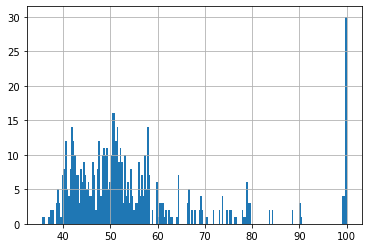

In [24]:
D.AAI.hist(bins=200)

In [19]:
M=D.AAI.unstack()
idx= M.index.union(M.columns)
M=M.reindex(index=idx,columns=idx).fillna(40)

M.values[np.eye(M.shape[0],dtype=int)]=100

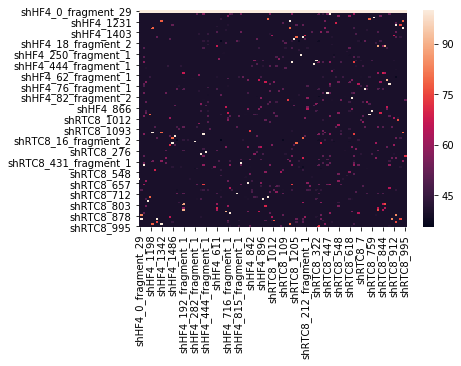

In [20]:
sns.heatmap(M)

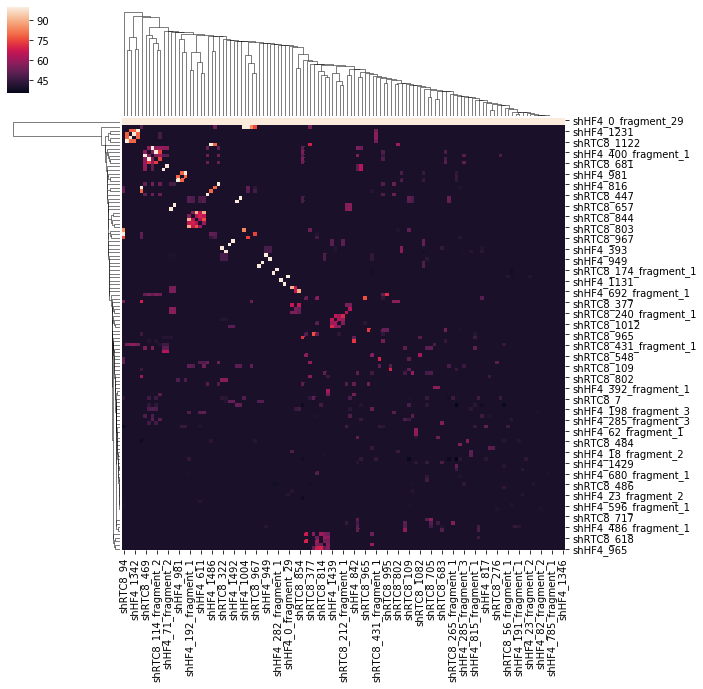

In [21]:
sns.clustermap(M)

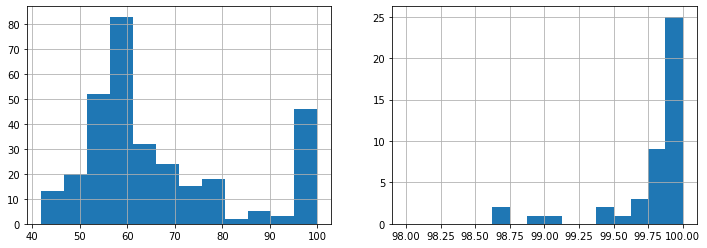

In [20]:
f,axe= plt.subplots(1,2,figsize=(12,4))
D.AAI.hist(bins='auto',ax=axe[0])
D.AAI.hist(bins='auto',range=(98,100),ax=axe[1])


<module 'common.genome_pdist' from '/Users/silas/Documents/GitHub/genome_sketch/scripts/common/genome_pdist.py'>

In [33]:
import networkx as nx
G= gd.to_graph(D.query('AAI>=99'))

In [34]:
CC= nx.connected_components(G)

for cc in CC:
    if len(cc)>2:
        print(cc)
  

{'shHF4_1241', 'shHF4_1004', 'shRTC8_94'}


AAI  QSize  RefSize  QBases  RBases     KID    WKID  \
shHF4_1004 shRTC8_94   99.852  11436    34330   12221   36362  33.172  98.947   
shHF4_1241 shRTC8_94   99.978  11470    34330   11742   36362  32.907  99.866   
shRTC8_94  shHF4_1241  99.978  34330    11470   36362   11742  32.907  99.866   
           shHF4_1004  99.834  34330    11436   36362   12221  33.172  98.947   

                       SSU  Identity  
shHF4_1004 shRTC8_94   NaN   0.99852  
shHF4_1241 shRTC8_94   NaN   0.99978  
shRTC8_94  shHF4_1241  NaN   0.99978  
           shHF4_1004  NaN   0.99834

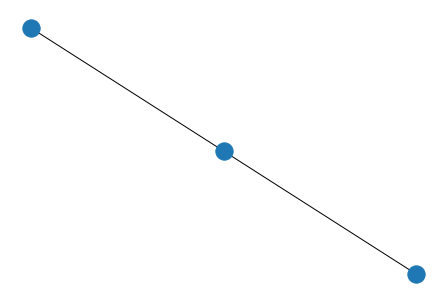

In [35]:
cc= {'shHF4_1241', 'shHF4_1004', 'shRTC8_94'}
nx.draw(G.subgraph(cc))

D.loc[(cc,cc),:]


In [38]:
names=','.join(cc)
!filterbyname.sh in=viruses.fasta out=VirusCluster.fasta names=$names include=t ow

/Users/silas/miniconda3/opt/bbmap-38.76-0//calcmem.sh: line 75: [: -v: unary operator expected
Max memory cannot be determined.  Attempting to use 800 MB.
If this fails, please add the -Xmx flag (e.g. -Xmx24g) to your command, 
or run this program qsubbed or from a qlogin session on Genepool, or set ulimit to an appropriate value.
java -ea -Xmx800m -cp /Users/silas/miniconda3/opt/bbmap-38.76-0/current/ driver.FilterReadsByName in=viruses.fasta out=VirusCluster.fasta names=shHF4_1241,shHF4_1004,shRTC8_94 include=t ow
Executing driver.FilterReadsByName [in=viruses.fasta, out=VirusCluster.fasta, names=shHF4_1241,shHF4_1004,shRTC8_94, include=t, ow]

Input is being processed as unpaired
Time:                         	0.221 seconds.
Reads Processed:        1878 	8.49k reads/sec
Bases Processed:      19569k 	88.45m bases/sec
Reads Out:          3
Bases Out:          217700


In [32]:
D.query('AAI>=99')

,,AAI,QSize,RefSize,QBases,RBases,KID,WKID,SSU,Identity
shHF4_1486,shRTC8_190,99.915,9898,26148,10122,27200,39.418,99.368,NaN,0.99915
shRTC8_190,shHF4_1486,99.915,26148,9898,27200,10122,39.418,99.368,NaN,0.99915
shHF4_282_fragment_1,shRTC8_174_fragment_1,100.000,23070,23071,24046,24047,100.000,100.000,NaN,1.00000
shRTC8_174_fragment_1,shHF4_282_fragment_1,100.000,23071,23070,24047,24046,100.000,100.000,NaN,1.00000
shHF4_1004,shRTC8_94,99.852,11436,34330,12221,36362,33.172,98.947,NaN,0.99852
shHF4_1005,shRTC8_469,99.621,13003,17220,13540,17876,72.914,97.171,NaN,0.99621
shRTC8_801,shHF4_1131,99.919,11649,11491,12049,11867,97.852,99.454,NaN,0.99919
shHF4_1131,shRTC8_801,99.935,11491,11649,11867,12049,97.852,99.454,NaN,0.99935
shRTC8_873,shHF4_71_fragment_2,99.096,12121,13188,12489,13764,86.463,93.602,NaN,0.99096
shHF4_1241,shRTC8_94,99.978,11470,34330,11742,36362,32.907,99.866,NaN,0.99978


In [68]:
complete_phages= !cat VIBRANT_results_*_contigs/VIBRANT_complete_circular_*_contigs.tsv | cut -f1

In [73]:
D.loc[(complete_phages,complete_phages),'AAI']#.query('AAI==100')

Series([], Name: AAI, dtype: float64)

In [74]:
D.loc[complete_phages]

AAI  QSize  RefSize  QBases  RBases  \
#Query      Ref                                                             
shRTC8_8195 shHF4_18233             98.78   1341      436    1381     460   
shRTC8_3063 shRTC8_6511             75.29   2799     1366    2927    1485   
shRTC8_801  shHF4_1131              99.96  12314    12076   12802   12524   
shRTC8_94   shHF4_1241             100.00  37464    11448   38896   11736   
            shHF4_1004              99.78  37464    12307   38896   12902   
            shHF4_2374              98.64  37464     5283   38896    5491   
            shRTC8_878              85.36  37464    11443   38896   11851   
            shRTC8_1175             79.86  37464     8703   38896    9095   
            shRTC8_967              77.76  37464    10738   38896   11058   
            shRTC8_9037             92.24  37464     1205   38896    1310   
            shRTC8_6510             84.50  37464     1599   38896    1882   
            shRTC8_20055            95.00  37464      540   38896     624   
            shRTC8_24303            86.79  37464      407   38896     431   
            shHF4_3950              71.21  37464     3370   38896    3591   
            shHF4_6118              74.67  37464     1639   38896    1743   
            shRTC8_4212             72.29  37464     2281   38896    2405   
            shRTC8_377              56.55  37464    19443   38896   20299   
            shRTC8_190              51.78  37464    26639   38896   27647   
            shHF4_67                42.60  37464    53149   38896   57311   
shHF4_866   shRTC8_1633            100.00  14334     7357   15001    7630   
            shRTC8_13196            96.43  14334      900   15001     940   
            shRTC8_3405             75.67  14334     2935   15001    3424   
            shRTC8_854              65.60  14334    10860   15001   12228   
            shRTC8_3985             74.29  14334     2901   15001    2989   
            shHF4_692_fragment_1    63.04  14334    12267   15001   14789   
            shHF4_4515              71.38  14334     3053   15001    3204   
            shHF4_8188              74.34  14334     1169   15001    1217   
            shRTC8_8327             74.10  14334     1445   15001    1517   
            shRTC8_8843             73.10  14334      973   15001    1174   
            shRTC8_1207             61.71  14334     8004   15001    9827   
            shRTC8_2736             64.89  14334     4426   15001    4578   
            shHF4_2759              64.40  14334     5036   15001    5627   
            shHF4_896               58.05  14334    13741   15001   14721   
            shRTC8_2360             58.33  14334     5163   15001    5339   
            shHF4_3032              61.71  14334     4952   15001    5160   
            shRTC8_240_fragment_1   56.15  14334    12781   15001   13277   
            shRTC8_1896             59.70  14334     6491   15001    6707   
            shRTC8_657              53.82  14334    14499   15001   15115   
            shHF4_837               53.60  14334    15199   15001   15847   
shHF4_2016  shRTC8_1093             80.50   7072    10038    7890   10663   
            shHF4_8634              85.87   7072     1215    7890    1369   
            shHF4_3078              74.72   7072     4445    7890    4653   
            shHF4_4789              75.24   7072     2939    7890    3035   
            shHF4_4733              66.55   7072     2477    7890    2897   
shHF4_4003  shRTC8_5715            100.00   3208     1892    3328    2053   
            shHF4_1_fragment_5      61.95   3208     3889    3328    4017   
            shRTC8_317_fragment_1   62.79   3208     5424    3328    5560   

                                   QTaxID  RTaxID    KID    WKID     ANI  \
#Query      Ref                                                            
shRTC8_8195 shHF4_18233                -1      -1  26.92   87.50   99.95   
shRTC8_3063 shRTC8_6511             